In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory

dataset = image_dataset_from_directory('data', label_mode='categorical')


In [2]:
dataset_iter = iter(dataset)
image_batch, labels_batch = next(dataset_iter)
print(image_batch.shape)
print(labels_batch.shape)

(32, 256, 256, 3)
(32, 4)


In [ ]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

print(f"До: {image_batch.astype('uint16')}")

In [ ]:
print(f"После: {image_batch / 255}")

In [ ]:
import cv2
import numpy as np
single_image = np.array(image_batch[2])
print(f"Изображение до изменения размера: {single_image.shape}")
resized_image = cv2.resize(single_image, (100, 100))
print(f'Изображение после изменения размера {resized_image.shape}')

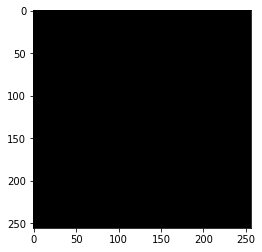

In [6]:
import matplotlib.pyplot as plt
plt.imshow(single_image.astype('uint16'))
plt.show()

<Figure size 432x288 with 0 Axes>

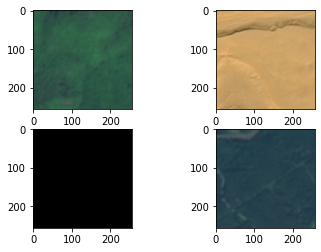

In [7]:
plt.figure()
ROWS = 2
COLUMNS = 2

figure = plt.figure()

for idx, image in enumerate(image_batch):
    index = idx + 1
    if index == 5:
        break
    figure.add_subplot(ROWS, COLUMNS, index)
    plt.imshow(image.astype('uint16'))
plt.show()

In [8]:
model = Sequential()
model.add(Flatten(input_shape=(256, 256, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 128)               25165952  
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 25,166,468
Trainable params: 25,166,468
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import TensorBoard
tensorboard_callback = TensorBoard(log_dir='tensorboard_journals', histogram_freq=1)
history = model.fit(dataset, epochs=10, callbacks=[tensorboard_callback])

(32, 4)


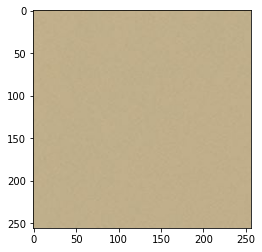

[0. 1. 0. 0.]


In [19]:
RESULT_INDEX = 5

images_batch, _ = next(iter(dataset))
result = model.predict(images_batch)
print(result.shape)
plt.imshow(images_batch[RESULT_INDEX].astype('uint16'))
plt.show()
print(result[RESULT_INDEX])